# Topic Modelling

This notebook looks at the key topics in each city, to try and uncover the reasons why we have differences between them

In [1]:
import pandas as pd
import numpy as np
from src.utils import import_data
from src.topic_modelling import topic_modelling
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [2]:
df = import_data("job-hunter-plus-data", "indeed_data.csv")
df2 = df #Make a copy to avoid having to download from the S3 bucket one every run.

In [6]:
print(df["job_description"][1])

Job Description
IBM LOGO
DO YOUR BEST WORK EVER.
Job DescriptionAs Watson Health Client Engagement Data Scientist you will be supporting the sales of solutions that will transform healthcare & life sciences with cognitive computing. You will collaborate with a team of modeling scientists and optimization scientists to deliver high quality predictive models and cutting-edge analytical solutions to clients. Expected to have expertise of Advanced Analytics techniques that are traditionally applied to structured data, as well as deep understanding of Natural Language Processing and Machine Learning techniques for unstructured content, so as to enable composition of holistic cognitive solutions. You will work with external clients along with other IBM team members, across business and geographical boundaries, to design and execute projects that are related with Watson Healthcare. Candidates should have a strong coding and/or analytic skills coupled with strong business acumen and an ability

In [10]:
topic_modelling(df, "San+Francisco", n_topics=15)

['financial' 'business' 'management' 'finance' 'analyst' 'project'
 'accounting' 'ability' 'bank' 'skills']
['disability' 'veteran' 'form' 'duty' 'answer' 'self' 'active' 'ground'
 'reasonable' 'accommodation']
['careers' 'contact' 'privacy' 'overview' 'terms' 'services' 'search'
 'resources' 'facebook' 'investors']
['salesforce' 'cloud' 'overview' 'sales' 'salesforcecom' 'english'
 'customer' 'community' 'app' 'platform']
['learning' 'machine' 'machine learning' 'engineer' 'software' 'apply'
 'software engineer' 'algorithms' 'engineering' 'ml']
['status' 'gender' 'employment' 'equal' 'veteran' 'sexual'
 'sexual orientation' 'orientation' 'national' 'disability']
['county' 'resources' 'applicants' 'human resources' 'announcement'
 'department' 'employment' 'human' 'service' 'email']
['clinical' 'research' 'scientist' 'development' 'scientific' 'biology'
 'laboratory' 'drug' 'south' 'discovery']
['marketing' 'product' 'sales' 'customer' 'growth' 'team' 'manager'
 'digital' 'customers' '

- Visually take apart the top level topics in each case:

In [192]:
sf_topics = {"San Francisco": ["Finance", "Veterans", "General", "SalesForce", "Data Science",\
             "EEO", "HR", "Clinical Research", "Digital Marketing", "General", "Data Science",\
             "Qualifications", "General", "General", "General"]}

In [16]:
topic_modelling(df, "New+York", n_topics=15)

['business' 'experience' 'data' 'project' 'management' 'analyst' 'skills'
 'support' 'ability' 'requirements']
['medicine' 'health' 'school' 'medical' 'center' 'view' 'hospital' 'share'
 'patient' 'care']
['veteran' 'disability' 'military' 'form' 'select' 'ground' 'active'
 'veterans' 'answer' 'self']
['email' 'start' 'accounts' 'talent' 'account' 'community' 'apply'
 'synchronize' 'verification' 'jobs']
['health' 'medicine' 'physician' 'clinical' 'community' 'join' 'contact'
 'specialty' 'military' 'school']
['page' 'search' 'main' 'return' 'content' 'set' 'profile' 'home' 'service'
 'beginning']
['data' 'learning' 'machine' 'machine learning' 'data scientist'
 'scientist' 'data science' 'science' 'engineer' 'experience']
['corporate' 'apply' 'risk' 'view' 'banking' 'financial' 'search'
 'programs' 'investment' 'management']
['care' 'patient' 'patients' 'practice' 'clinical' 'health' 'physician'
 'medical' 'plan' 'outcomes']
['marketing' 'digital' 'analytics' 'insights' 'media' 'sales

In [193]:
ny_topics = {"New York": ["Business Analysis", "Medical", "Veterans", "General", "Medical",\
             "General", "Data Science", "Finance", "Medical", "Digital Marketing",\
             "General", "EEO", "Clinical Research", "Finance", "General"]}

In [20]:
topic_modelling(df, "Chicago", n_topics=15)

['business' 'data' 'experience' 'project' 'technical' 'solutions'
 'development' 'skills' 'software' 'support']
['main' 'page' 'content' 'search' 'return' 'set' 'profile' 'service'
 'submit' 'searches']
['insights' 'contact' 'people' 'clients' 'help' 'linked' 'careers'
 'featured' 'digital' 'search']
['email' 'enter' 'apply' 'accounts' 'account' 'talent' 'start' 'community'
 'jobs' 'verification']
['disability' 'veteran' 'status' 'military' 'employment' 'form' 'protected'
 'active' 'answer' 'veterans']
['data scientist' 'scientist' 'data' 'direct hire' 'hire' 'python' 'direct'
 'apply' 'machine' 'learning']
['search' 'intellectual' 'property' 'cardinal' 'searches' 'employment'
 'analysts' 'conducting' 'email' 'disclosure']
['careers' 'site' 'diversity' 'details' 'equal opportunity' 'healthy'
 'equal' 'privacy' 'live' 'opportunity']
['jobs' 'search' 'policy' 'view' 'apply' 'finance' 'category' 'talent'
 'location' 'web']
['health' 'research' 'care' 'clinical' 'university' 'center' 'heal

In [51]:
ch_topics = {"Chicago": ["Technical Support", "General", "General", "General", "Veterans", "Data Science",\
             "Intellectual Property", "EEO", "General", "Medical", "General", "Digital Marketing",\
             "Finance", "Consulting", "General"]}

In [27]:
topic_modelling(df, "Austin", n_topics = 15)

['business' 'experience' 'data' 'management' 'project' 'financial'
 'analyst' 'work' 'requirements' 'services']
['jobs' 'email' 'apply' 'talent' 'accounts' 'start' 'account' 'community'
 'verification' 'join']
['university' 'employment' 'federal' 'verification' 'documents' 'search'
 'required' 'status' 'return' 'information']
['people' 'jobs' 'search' 'mission' 'gender' 'view' 'help' 'content' 'site'
 'benefits']
['search' 'content' 'page' 'return' 'main' 'set' 'profile' 'home' 'session'
 'service']
['veteran' 'disability' 'military' 'answer' 'duty' 'form' 'active'
 'protected' 'ground' 'employment']
['product' 'marketing' 'digital' 'business' 'vacation' 'team' 'analytics'
 'customer' 'manager' 'home']
['data' 'learning' 'machine' 'machine learning' 'data science' 'science'
 'data scientist' 'scientist' 'analytics' 'ai']
['referral' 'jobs' 'close' 'portal' 'careers' 'privacy' 'thank' 'view'
 'contact' 'terms']
['security' 'labs' 'information security' 'information' 'test' 'risk'
 'visa

In [56]:
au_topics = {"Austin":["Business Analysis", "General", "Qualifications", "HR", "General", "Veterans",\
             "Digital Marketing", "Data Science", "General", "InfoSec", "EEO", "General",\
             "Sales", "Digital Marketing", "General"]}
list(au_topics.values())[0]

['Business Analysis',
 'General',
 'Qualifications',
 'HR',
 'General',
 'Veterans',
 'Digital Marketing',
 'Data Science',
 'General',
 'InfoSec',
 'EEO',
 'General',
 'Sales',
 'Digital Marketing',
 'General']

In [194]:
list1 = []
list2 = []
for i, topics in enumerate([au_topics, ch_topics, ny_topics, sf_topics]):
    for k, v in topics.items():
        for j, value in enumerate(v):
            if value == "General":
                continue
            list1 += [k]
            list2 += [value]
arr = np.column_stack((list1, list2))

# Compare the topics from each city - create a "barcode"

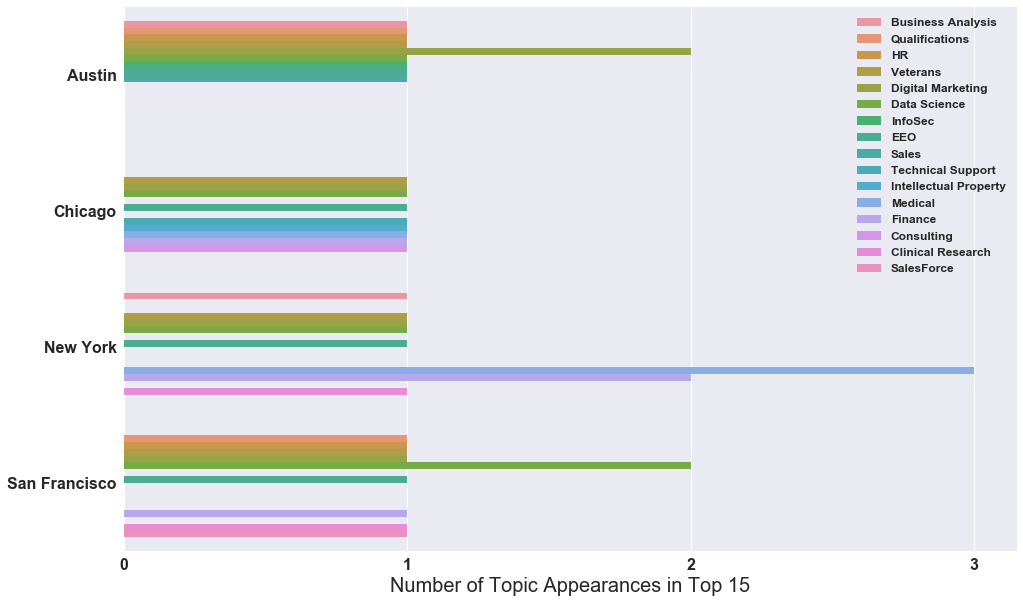

In [201]:
plt.subplots(figsize=[16, 10])
rc={'axes.labelsize': 20, 'font.size': 30 , 'legend.fontsize': 12.0}
plt.rcParams.update(**rc)

plt.rc('font', **font)
sns.set(rc=rc)
sns.countplot(y = arr[:,0], hue = arr[:,1])
plt.tick_params(labelsize=16)
plt.xticks([0, 1, 2, 3])
plt.xlabel("Number of Topic Appearances in Top 15")
plt.savefig('topic_barcodes.png', bbox_inches='tight')


# Let's compare New York with San Francisco

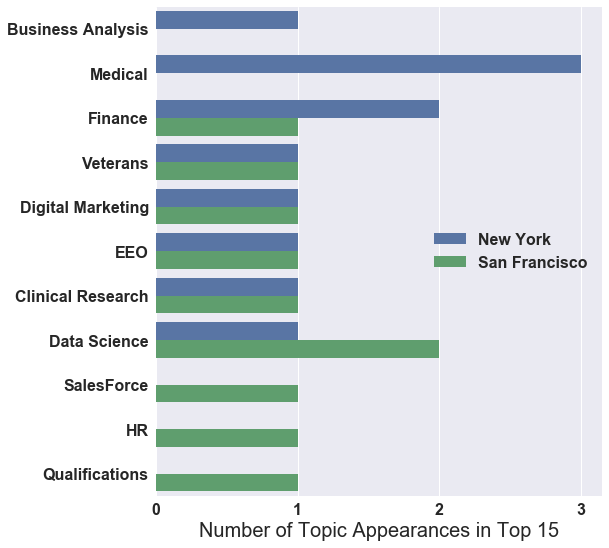

In [199]:
arr2 = arr[(arr[:,0] == "San Francisco") | (arr[:,0] == "New York")]
plt.subplots(figsize=[8,9])
rc={'axes.labelsize': 20, 'font.size': 30 , 'legend.fontsize': 16.0}
plt.rcParams.update(**rc)

plt.rc('font', **font)
sns.set(rc=rc)
order = ["Business Analysis", "Medical", "Finance", "Veterans", "Digital Marketing", "EEO",\
         "Clinical Research", "Data Science", "SalesForce", "HR", "Qualifications"]
sns.countplot(y = arr2[:,1], hue = arr2[:,0], order=order)
plt.tick_params(labelsize=16)
plt.xticks([0, 1, 2, 3])
plt.xlabel("Number of Topic Appearances in Top 15")
plt.savefig('two_city_comparison.png', bbox_inches='tight')

# Let's Compare the content of a topic between two cities